Predicting average rate of increase in cases

In [1]:
#import required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#imports dataset using pandas
dataset = pd.read_csv('oxford_cgrt.csv')

#rows, columns
dataset.shape

(10561, 35)

In [2]:
#manipulate dataset

#dates did not convert correctly, however they are still organized correctly 
dataset["Date"]=pd.to_datetime(dataset["Date"]) #data in column converts to datetime

dataset = dataset.sort_values(by=['CountryName', 'Date']) #sorts the countries together and also by date 

#Last observation carried forward (LOCF) applied to each country so values are not carried to another country.
dataset = dataset.groupby(['CountryCode']).fillna(method='ffill') 

#average confirmed cases as our y 
dataset['ConfirmedCases'] = dataset['ConfirmedCases'].fillna(1) 
y = dataset.groupby('CountryName')['ConfirmedCases'].mean()

#gets last row for each country 
dataset = dataset.groupby('CountryName').tail(1) 


In [4]:
#statistical details of dataset
dataset.describe()

,S1_School closing,S1_IsGeneral,S2_Workplace closing,S2_IsGeneral,S3_Cancel public events,S3_IsGeneral,S4_Close public transport,S4_IsGeneral,S5_Public information campaigns,S5_IsGeneral,...,S6_IsGeneral,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,ConfirmedCases,ConfirmedDeaths,StringencyIndex,AverageCases
count,90.000000,88.000000,86.000000,82.000000,89.000000,86.000000,85.000000,62.000000,85.000000,83.000000,...,81.000000,88.000000,7.700000e+01,69.000000,7.100000e+01,6.600000e+01,190.000000,186.000000,88.000000,186.000000
mean,1.777778,0.840909,1.453488,0.658537,1.831461,0.779070,0.847059,0.612903,0.941176,0.915663,...,0.691358,2.670455,2.889838e+10,2.212464,2.156986e+09,3.115072e+06,3765.278947,180.510753,63.465909,580.221994
std,0.576268,0.367857,0.806692,0.477119,0.458157,0.417307,0.906404,0.491062,0.236691,0.279582,...,0.464811,0.753865,2.335696e+11,5.024769,1.779952e+10,2.462353e+07,15935.365920,1004.076611,23.991353,3521.095838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,-0.750000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.909091
25%,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,14.000000,0.000000,48.000000,6.843750
50%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,0.000000e+00,0.250000,0.000000e+00,0.000000e+00,139.000000,1.000000,67.000000,39.321267
75%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,0.000000e+00,3.000000,0.000000e+00,0.000000e+00,800.250000,12.500000,81.500000,123.463768
max,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,2.050000e+12,38.000000,1.500000e+11,2.000509e+08,143025.000000,10781.000000,100.000000,45221.111110


In [5]:
#clean data
dataset.isnull().any()

CountryName                                False
Date                                       False
S1_School closing                           True
S1_IsGeneral                                True
S1_Notes                                    True
S2_Workplace closing                        True
S2_IsGeneral                                True
S2_Notes                                    True
S3_Cancel public events                     True
S3_IsGeneral                                True
S3_Notes                                    True
S4_Close public transport                   True
S4_IsGeneral                                True
S4_Notes                                    True
S5_Public information campaigns             True
S5_IsGeneral                                True
S5_Notes                                    True
S6_Restrictions on internal movement        True
S6_IsGeneral                                True
S6_Notes                                    True
S7_International tra

In [6]:
#remove null values from columns
dataset = dataset.fillna(0) #Replace all NaN elements with 0s

In [7]:
dataset.isnull().any()

CountryName                                False
Date                                       False
S1_School closing                          False
S1_IsGeneral                               False
S1_Notes                                   False
S2_Workplace closing                       False
S2_IsGeneral                               False
S2_Notes                                   False
S3_Cancel public events                    False
S3_IsGeneral                               False
S3_Notes                                   False
S4_Close public transport                  False
S4_IsGeneral                               False
S4_Notes                                   False
S5_Public information campaigns            False
S5_IsGeneral                               False
S5_Notes                                   False
S6_Restrictions on internal movement       False
S6_IsGeneral                               False
S6_Notes                                   False
S7_International tra

In [8]:
#dividing data into “attributes” and “labels”
X = dataset[['S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S4_Close public transport', 'S5_Public information campaigns', 'S6_Restrictions on internal movement', 'S7_International travel controls', 'S8_Fiscal measures', 'S9_Monetary measures', "S10_Emergency investment in health care", "S11_Investment in Vaccines"]]
y = np.log10(y) #log transformation since values in the average number of cases behave roughly exponential

In [28]:
y

CountryName
Afghanistan                     0.943385
Albania                         1.906286
Algeria                         1.525189
Andorra                         2.082996
Angola                          0.083184
Antigua and Barbuda             0.549672
Argentina                       1.832228
Armenia                         1.600179
Aruba                           1.159701
Australia                       2.566781
Austria                         2.916940
Azerbaijan                      1.198856
Bahamas                         0.749380
Bahrain                         1.876685
Bangladesh                      1.409722
Barbados                        0.489802
Belarus                         1.120815
Belgium                         2.917811
Belize                          0.023481
Benin                           0.552842
Bermuda                         0.356929
Bhutan                          0.301030
Bolivia                         0.903686
Bosnia and Herzegovina          2.016801
Bots

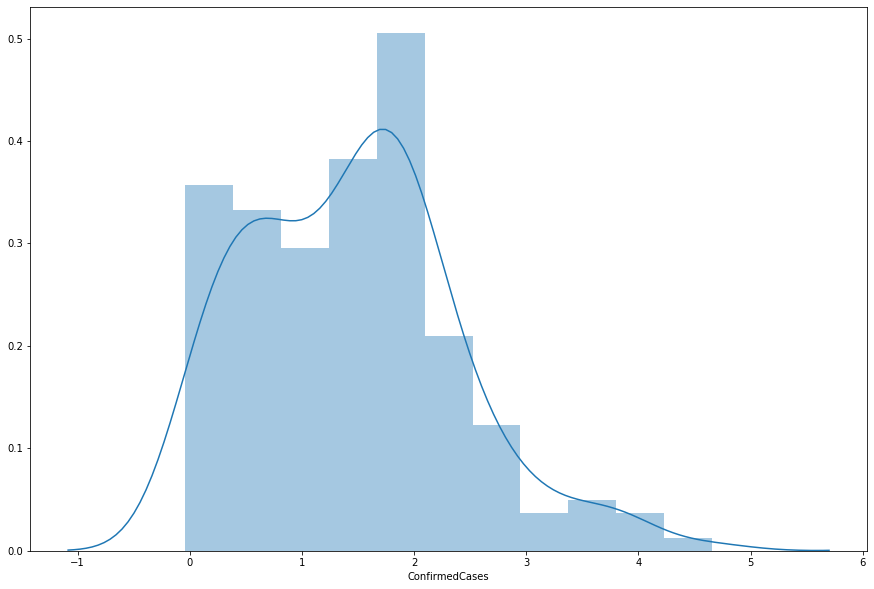

In [10]:
#average values of AverageCases column
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y) 

In [11]:
#split 80% of the data to the training set while 20% of the data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#coefficients regression model has chosen 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
S1_School closing,3.432133e-02
S2_Workplace closing,1.174703e-01
S3_Cancel public events,3.407194e-01
S4_Close public transport,-2.536337e-01
S5_Public information campaigns,1.159206e-01
S6_Restrictions on internal movement,1.908325e-01
S7_International travel controls,-1.331259e-01
S8_Fiscal measures,7.513007e-12
S9_Monetary measures,-3.733652e-03
S10_Emergency investment in health care,-9.121696e-11


In [14]:
#prediction on test data
y_pred = regressor.predict(X_test)

In [15]:
#check difference between actual and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
CountryName,,
Madagascar,1.245513,1.140964
Guam,1.500602,1.140964
Spain,3.835644,1.970560
Kenya,0.618450,1.943491
Namibia,2.845176,1.140964
Greece,2.087978,2.122379
Belize,0.023481,1.716471
Nepal,-0.041393,1.140964
Qatar,1.991718,1.707592


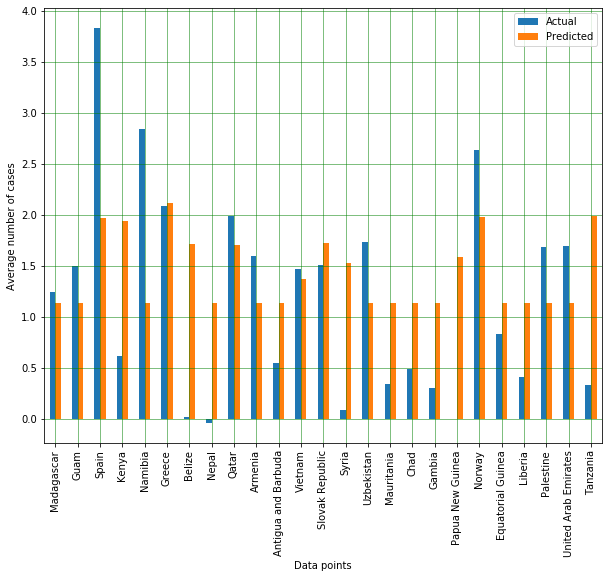

In [16]:
#plot comparison of actual vs predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Data points')
plt.ylabel('Average number of cases')
plt.show()

In [17]:
#evaluate performance of algorithm 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8496078811348932
Mean Squared Error: 1.031770535167846
Root Mean Squared Error: 1.0157610620455215


In [21]:
#computing Relative Absolute Error 
a = np.power(y_pred - y_test,2)
n = np.sum(a)
b = np.power(y_test,2)
d = np.sum(b)
RAE = np.power(n,0.5)/np.power(d,0.5) #the formula used here is apparently an earlier RAE formula 
RAE 

0.5884536225732864

In [24]:
#another way of computing RAE
np.linalg.norm(y_pred - y_test)/np.linalg.norm(y_test) #refer to this formula as the relative error in x 

0.5884536225732864